In [76]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

In [77]:
def Cov_fn(y,L):
    temp = m.e(-1*abs(y)/L)/(2*L)
    return(temp)

In [78]:
def alpha_bar(x):
    D = 2
    temp = 1+np.sin(m.pi*((x/D)+0.5))
    return(temp)

In [79]:
def eig_val_even(L,eta):
    temp = (1+L**2*eta**2)**(-1)
    return(temp)

def eig_vec_even(x,eta):
    temp = np.cos(eta*x)/np.sqrt(1+(np.sin(2*eta))/(2*eta))
    return(temp)

def eig_val_odd(L,eta):
    temp = (1+L**2*eta**2)**(-1)
    return(temp)

def eig_vec_odd(x,eta):
    temp = np.sin(eta*x)/np.sqrt(1-(np.sin(2*eta))/(2*eta))
    return(temp)



In [80]:
def transc1(eta):
    L = 1E-4
    temp = (1-L*eta*np.tan(eta))
    return (temp)

def transc2(eta):
    L = 1E-4
    temp = (L*eta+np.tan(eta))
    return (temp)

In [81]:
R1 = [0]
R2 = [0]
guess = 0.0
count = 0.0
while ((np.size(R1) + np.size(R2)) < 20):
    guess = guess+1
    root1 = fsolve(transc1,guess,xtol=1E-14)
    root2 = fsolve(transc2,guess,xtol=1E-14)
    count=count+1
    if (abs(R1[-1]-root1) >1E-4):
        R1.append(root1)
    if (abs(R2[-1]-root2) >1E-4):
        R2.append(root2)


/Users/akhilmarayikkottuvijayan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/akhilmarayikkottuvijayan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


(0.8, 2.3)

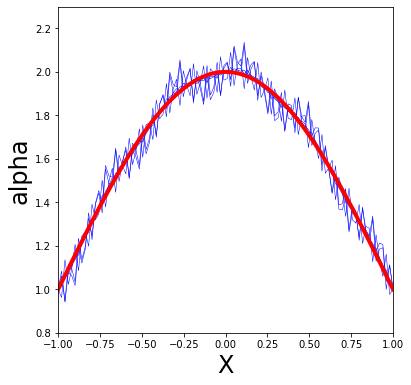

In [82]:
X = np.linspace(-1,1,100)
Num_realization = 5
plt.figure(figsize=(6,6))

for l in range(0,Num_realization):
    Alpha  =  np.zeros(np.size(X))
    Alpha2 =  np.zeros(np.size(X))
    Sum1   =  np.zeros(np.size(X))
    Sum2   =  np.zeros(np.size(X))
    Lp     =  1E-4
    for j in range (0,np.size(R1)):
        Sum = np.sqrt(eig_val_even(Lp,R1[j]))*eig_vec_even(X[:],R1[j])*np.random.normal(0,.1,size=None)
        Alpha[:] = 0.5*alpha_bar(X[:])+Sum
    
    for k in range (0,np.size(R2)):
        Sum = np.sqrt(eig_val_odd(Lp,R2[k]))*eig_vec_odd(X[:],R2[k])*np.random.normal(0,.1, size=None)
        Alpha2[:] = 0.5*alpha_bar(X[:])+Sum
    
    Alpha[:] = Alpha2[:]+Alpha[:]
    plt.plot(X,Alpha,'b',linewidth=.5)
plt.plot(X,alpha_bar(X),'r',linewidth=4)    
plt.xlabel('X',fontsize=24)
plt.ylabel('alpha',fontsize=24)
plt.xlim([-1,1])
plt.ylim([0.8,2.3])
#plt.savefig('10E8.eps')

In [83]:
L = 1E-4
lambda_even = eig_val_even(L,np.array(R1))
lambda_odd  = eig_val_odd(L,np.array(R2))

In [84]:
Eig = np.zeros((np.size(lambda_even)+np.size(lambda_odd)))

for i in range (0,np.size(lambda_even)):
    Eig[i] = lambda_even[i]
    
for i in range (0+np.size(lambda_even),np.size(lambda_even)+np.size(lambda_odd)):
    Eig[i] = lambda_odd[i-np.size(lambda_even)]

Eig.sort() 
#Eig

In [85]:
Index   = np.array([1,2,3,4,5,6,7,8,9,10,11])
Eig_1E8 = np.array([1,1.103211E-17,2.533E-18,1.1257E-18,6.3325E-19,4.0528E-19,2.8145E-19,2.0677E-19,1.5831E-19,1.2508E-19,1.01325E-19])
Eig_10  = np.array([1.00000000,9.36734152e-02,9.92206644e-04,4.46107255e-04,2.51964385e-04,1.12313717e-04,8.25678156e-05,6.32416655e-05,4.04940162e-05,2.81281507e-05,2.06688184e-05])
Eig_1   = np.array([1,0.57465522,0.19547062,0.07852461,0.03977829,0.02356334,0.01546573,0.01089227,0.00807173,0.00621491,0.00400427])
Eig_1En6= np.array([1,.999999,.999996,.999995,.999994,.999917,.999898,.999888,.999821,.998242,.9997972])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


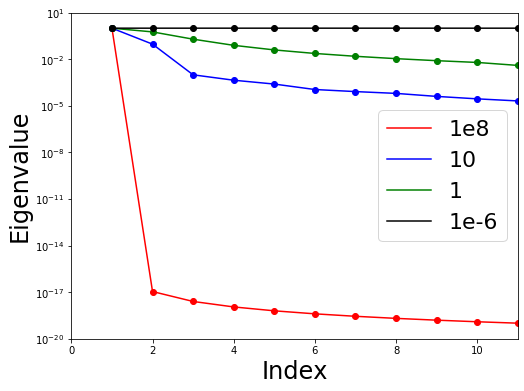

In [86]:
plt.figure(figsize=(8,6))
plt.semilogy(Index,Eig_1E8  ,'r',label='1e8'  )
plt.semilogy(Index,Eig_1E8  ,'ro'             )
plt.semilogy(Index,Eig_10   ,'b',label='10'   )
plt.semilogy(Index,Eig_10   ,'bo' )
plt.semilogy(Index,Eig_1    ,'g',label='1'    )
plt.semilogy(Index,Eig_1    ,'go')
plt.semilogy(Index,Eig_1En6 ,'k',label='1e-6' )
plt.semilogy(Index,Eig_1En6 ,'ko' )
plt.legend(fontsize=22)
plt.xlabel('Index',fontsize=24)
plt.ylabel('Eigenvalue',fontsize=24)
plt.xlim([0,11])
plt.ylim([1E-20,10])
plt.savefig('EigenVals.eps')

#  Thermal solver

In [87]:
def T0(x,Tl):
    temp = Tl+m.e**(-1*x**2/0.05)
    return(temp)

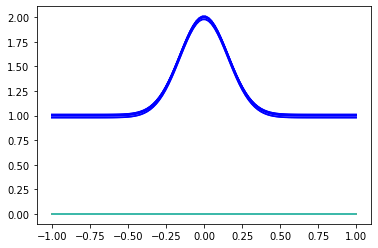

In [89]:
X  = np.linspace(-1,1,100)
dX = X[1]-X[0]
dt =  .0001
Num_samp = 10

T_samp   = np.zeros((np.size(X),Num_samp))
T0_samp  = np.zeros((np.size(X),Num_samp))


for l in range (0,Num_samp):
    Tl = np.random.normal(1,0.01)
    Tr = Tl
    T  = T0(X,Tl)
    plt.plot(X,T,'b')
    #T0_samp.append(T0(X,Tl))
    T0_samp[:,l] = T0(X,Tl)
    for k in range (1,200):
        for i in range (1,np.size(T)-2):
            A    = alpha_bar(X[i])*dt/dX**2
            #A    = Alpha[i]*dt/dX**2
            T[i] = T[i]+A*(T[i+1]-2*T[i]+T[i-1])
            if(k == 199): 
                #T_samp.append(T)
                #T_samp[:,l] = T
                plt.plot(X,T_samp)



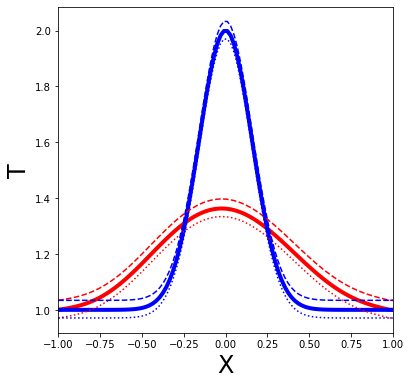

In [74]:
Avg_T  = np.zeros((np.size(X)))
Max_T  = np.zeros((np.size(X)))
Min_T  = np.zeros((np.size(X)))

Avg_T0 = np.zeros((np.size(X)))
Max_T0 = np.zeros((np.size(X)))
Min_T0 = np.zeros((np.size(X)))



for i in range (0,1000):
    Avg_T  = Avg_T  + T_samp[:,i]
    Avg_T0 = Avg_T0 + T0_samp[:,i]
Avg_T  = Avg_T /1000
Avg_T0 = Avg_T0/1000


for i in range (0,100):
    Max_T[i]  = max(T_samp[i,:] )
    Min_T[i]  = min(T_samp[i,:] )
    Max_T0[i] = max(T0_samp[i,:])
    Min_T0[i] = min(T0_samp[i,:])
    

plt.figure(figsize=(6,6))
plt.xlabel('X',fontsize=24)
plt.ylabel('T',fontsize=24)
plt.xlim([-1,1])
#plt.ylim([1E-20,10])
plt.plot(X,Avg_T ,'r',linewidth=4)
plt.plot(X,Avg_T0,'b',linewidth=4)
plt.plot(X,Max_T,'r--')
plt.plot(X,Min_T,'r:')
plt.plot(X,Min_T0,'b:')
plt.plot(X,Max_T0,'b--')

plt.savefig('Thermal1.eps')

In [46]:
T_samp[20]

array([1.01542146, 1.01733831, 1.01935355, 1.02153537, 1.02394713,
       1.02664773, 1.02969162, 1.03312882, 1.03700459, 1.04135913,
       1.04622715, 1.05163746, 1.05761251, 1.06416805, 1.07131277,
       1.0790481 , 1.08736804, 1.09625919, 1.10570075, 1.11566479,
       1.12611651, 1.13701463, 1.14831191, 1.15995568, 1.17188847,
       1.18404869, 1.19637135, 1.20878876, 1.22123129, 1.23362813,
       1.24590796, 1.25799969, 1.26983312, 1.28133958, 1.2924525 ,
       1.30310797, 1.31324519, 1.32280696, 1.33174003, 1.33999545,
       1.34752884, 1.3543006 , 1.36027612, 1.36542593, 1.36972574,
       1.37315652, 1.37570453, 1.37736126, 1.37812341, 1.37799279,
       1.3769762 , 1.37508533, 1.37233657, 1.36875082, 1.36435333,
       1.35917347, 1.35324448, 1.34660321, 1.33928991, 1.33134789,
       1.32282327, 1.31376463, 1.30422275, 1.29425022, 1.28390114,
       1.27323077, 1.26229511, 1.25115061, 1.23985375, 1.22846067,
       1.21702677, 1.20560635, 1.19425221, 1.18301529, 1.17194

In [50]:
np.shape(T_samp)

(100, 1000)